In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

## read the data
churn = pd.read_csv("churn.csv")
churn.head()

In [5]:
churn.shape

(7043, 21)

In [23]:
## summarize data according to gender and churn or not
churn.groupby(["gender","Churn"]).count()

customerID  SeniorCitizen  Partner  Dependents  tenure  \
gender Churn                                                           
Female No           2549           2549     2549        2549    2549   
       Yes           939            939      939         939     939   
Male   No           2625           2625     2625        2625    2625   
       Yes           930            930      930         930     930   

              PhoneService  MultipleLines  InternetService  OnlineSecurity  \
gender Churn                                                                 
Female No             2549           2549             2549            2549   
       Yes             939            939              939             939   
Male   No             2625           2625             2625            2625   
       Yes             930            930              930             930   

              OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
gender Churn                                                             
Female No             2549              2549         2549         2549   
       Yes             939               939          939          939   
Male   No             2625              2625         2625         2625   
       Yes             930               930          930          930   

              StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
gender Churn                                                               
Female No                2549      2549              2549           2549   
       Yes                939       939               939            939   
Male   No                2625      2625              2625           2625   
       Yes                930       930               930            930   

              MonthlyCharges  TotalCharges  
gender Churn                                
Female No               2549          2549  
       Yes               939           939  
Male   No               2625          2625  
       Yes               930           930

[]

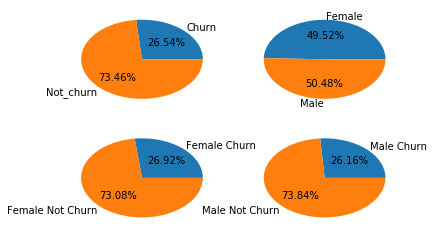

In [26]:
    ## plot the distribution of data according to the gender and churn or not
labels1=["Churn", "Not_churn"]
X1=[1869, 5174]  

labels2=["Female", "Male"]
X2=[2549+939, 2625+930]  

labels3=["Female Churn", "Female Not Churn"]
X3=[939, 2549]

labels4=["Male Churn", "Male Not Churn"]
X4=[930, 2625]

plt.figure()

plt.subplot(2,2,1)
plt.pie(X1,labels=labels1,autopct='%1.2f%%')
plt.plot()

plt.subplot(2,2,2)
plt.pie(X2,labels=labels2,autopct='%1.2f%%')
plt.plot()

plt.subplot(2,2,3)
plt.pie(X3,labels=labels3,autopct='%1.2f%%')
plt.plot()

plt.subplot(2,2,4)
plt.pie(X4,labels=labels4,autopct='%1.2f%%')
plt.plot()

In [350]:
# Stratified Random Sample according to gender 
Churn_train, Churn_test = train_test_split(churn, test_size=0.5, stratify=churn[["gender"]])

In [351]:
Churn_train.shape

(3521, 21)

In [352]:
Churn_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1655,7963-GQRMY,Female,0,Yes,Yes,3,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,44.3,134.5,Yes
5821,9066-QRSDU,Female,0,Yes,No,69,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,26.3,1763.55,No
2996,6620-JDYNW,Female,0,No,No,18,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,60.6,1156.35,No
4687,3647-GMGDH,Male,0,Yes,No,22,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),94.7,1914.9,Yes
4336,3244-CQPHU,Female,1,No,No,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.1,7746.7,No


In [353]:
ApplyData = Churn_train.iloc[:, 2: 20]
ResultData = Churn_train.iloc[:, 20]

In [354]:
ApplyData.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1655,0,Yes,Yes,3,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.3,134.5
5821,0,Yes,No,69,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,26.3,1763.55
2996,0,No,No,18,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,60.6,1156.35
4687,0,Yes,No,22,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),94.7,1914.9
4336,1,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.1,7746.7


In [355]:
## Data Cleaning for Principle component analysis
ApplyData = ApplyData.replace({"No":1, "Yes": 2, "No phone service": 3, "No internet service":3 })
ApplyData = ApplyData.replace({"DSL": 2, "Fiber optic": 3})
ApplyData = ApplyData.replace({"Month-to-month": 1, "One year": 2, "Two year": 3})
ApplyData = ApplyData.replace({"Electronic check": 1, "Mailed check": 2, "Bank transfer (automatic)": 3, "Credit card (automatic)":4})
ApplyData = ApplyData.replace({" ": 0})

In [356]:
ApplyData = ApplyData.apply(pd.to_numeric)

In [357]:
# Normalization 
ApplyData = ApplyData.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
ApplyData.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1655,0.0,1.0,1.0,0.041667,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.259591,0.015487
5821,0.0,1.0,0.0,0.958333,1.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.000000,0.080219,0.203062
2996,0.0,0.0,0.0,0.250000,1.0,0.5,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.333333,0.422023,0.133146
4687,0.0,1.0,0.0,0.305556,1.0,0.0,1.0,0.0,0.0,0.5,0.0,0.5,0.5,0.0,1.0,1.000000,0.761834,0.220489
4336,1.0,0.0,0.0,1.000000,1.0,0.5,1.0,0.5,0.5,0.0,0.5,0.5,0.5,1.0,1.0,0.666667,0.915296,0.891984


In [358]:
# Principle component analysis on data (2 Dimensions)
pca = PCA(n_components=2)  
pca.fit(ApplyData)
DataPca = pca.fit_transform(ApplyData)  

In [359]:
df = pd.DataFrame(DataPca)

In [360]:
df = pd.concat([df, ResultData], axis=1)

In [361]:
df.head()

,0,1,Churn
0,-0.478439,0.170087,NaN
1,1.480155,0.030305,NaN
2,-0.646941,-0.569271,NaN
3,-0.545065,0.251868,No
4,-0.253936,0.473312,Yes


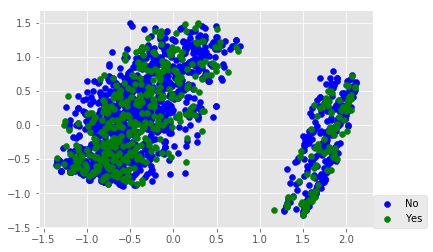

In [364]:
# visualize the result of PCA (2 Dimensions)
df1 = df[df["Churn"]=="No"]
df2 = df[df["Churn"]=="Yes"]

plt.scatter(df1[0], df1[1], color='blue', label='No')
plt.scatter(df2[0], df2[1], color='green', label='Yes')

plt.legend(loc=(1, 0))

plt.show()

In [365]:
# Principle component analysis on data (3 Dimensions)
PcaModel = PCA(n_components=3)
PcaModel.fit(ApplyData)
DataPca= PcaModel.fit_transform(ApplyData)

In [366]:
print(type(DataPca))
print(DataPca)

<class 'numpy.ndarray'>
[[-0.47843863  0.17008857  1.43008543]
 [ 1.48015474  0.03029785 -0.64524796]
 [-0.6469416  -0.56928393 -0.06658336]
 ...
 [ 1.63690639 -0.76780584 -0.18457198]
 [ 1.77904448 -0.17916031  0.70756022]
 [ 1.76858621 -0.4238442  -0.39195884]]


In [368]:
df = pd.DataFrame(DataPca)
df = pd.concat([df, ResultData], axis=1)

In [369]:
df1 = df[df["Churn"]=="No"]
df2 = df[df["Churn"]=="Yes"]

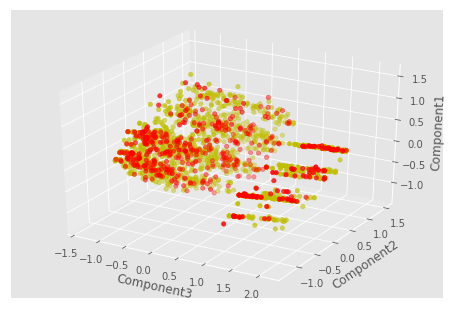

In [373]:
# visualize the result of PCA (3 Dimensions)
fig = plt.figure() 
ax = Axes3D(fig) 

ax.scatter(df1[0], df1[1], df1[2], c='y',label = 'No')  
ax.scatter(df2[0], df2[1], df2[2], c='r',label = 'Yes')

ax.set_zlabel('Component1')  
ax.set_ylabel('Component2')
ax.set_xlabel('Component3')
plt.show()